## A3C and ACER

This notebook contains test runs of two RL Algorithms.

Asynchronous Advantage Actor Critic

Asynchronous means multiple agents are trained at the same time and submit asynchronous weight updates to a shared model.
The Gradients are derived from the Advantage Funktion (Q-V).
There is a policy and a critic network, the critic network rates the Value of the actions of the policy.

Actor Critic with Experience Replay uses the innovations of A3C.
Experience Replay increses the sample Efficiency.


In [1]:
from baselines.common import plot_util as pu
import time
from baselines.run import run, play
import tensorflow as tf

/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/simon/miniconda3/envs/science/lib/pyt

### Default Parameter

In [2]:

dict(alg='acer', 
     env='CartPole-v0', # This works well with MountainCar-v0
     env_type=None, 
     gamestate=None,
     log_path='./logs/acer-tmp/',
     network=None, 
     num_env=None, 
     num_timesteps=30000.0, 
     play=False, 
     reward_scale=1.0,
     save_path='./models/model', 
     save_video_interval=0, 
     save_video_length=200, 
     seed=0,
     trust_region=True, 
     nsteps=128,
     replay_ratio=4)


{'alg': 'acer',
 'env': 'CartPole-v0',
 'env_type': None,
 'gamestate': None,
 'log_path': './logs/acer-tmp/',
 'network': None,
 'num_env': None,
 'num_timesteps': 30000.0,
 'play': False,
 'reward_scale': 1.0,
 'save_path': './models/model',
 'save_video_interval': 0,
 'save_video_length': 200,
 'seed': 0,
 'trust_region': True,
 'nsteps': 128,
 'replay_ratio': 4}

## Implementation Details

The Acer implementation can be found in the a3cacerdemo/baselines/acer/acer.py file

### Off-policy learning

During the Experience replay stage the algorithm uses a variant of the retrace algorithm, the function is implemented in baselines.acer.acer:

def q_retrace(R, D, q_i, v, rho_i, nenvs, nsteps, gamma):

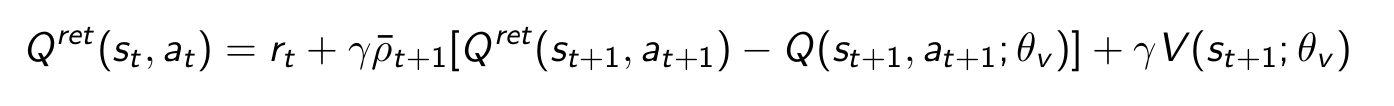

### Trust Regions

The acer paper introduces efficient trust regions which are supposed to stabilize training. 

k is a measure of the divergence of the current network with parameters $\theta$ and an average network with parameters $\theta_a$.

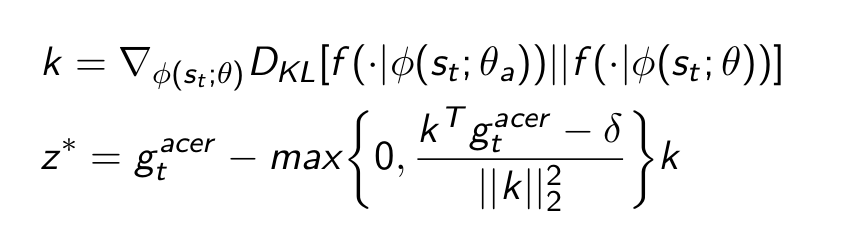

In [3]:
log_path="./logs/cartpole/"
for seed in range(0,6):
    run(seed=seed, trust_region=True, log_path=f"{log_path}cartpole-{str(seed)}/")

Logging to ./logs/cartpole/cartpole-0/


W0311 14:01:24.588233 139654933993280 deprecation_wrapper.py:119] From /home/simon/Documents/WiSe20/topicsrl/a3cacerdemo/baselines/run.py:109: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0311 14:01:24.589291 139654933993280 deprecation_wrapper.py:119] From /home/simon/Documents/WiSe20/topicsrl/a3cacerdemo/baselines/common/tf_util.py:53: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0311 14:01:24.589872 139654933993280 deprecation_wrapper.py:119] From /home/simon/Documents/WiSe20/topicsrl/a3cacerdemo/baselines/common/tf_util.py:67: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0311 14:01:24.590466 139654933993280 deprecation_wrapper.py:119] From /home/simon/Documents/WiSe20/topicsrl/a3cacerdemo/baselines/common/tf_util.py:69: The name tf.InteractiveSession is deprecated. Please use tf.compat.v1.InteractiveSession instead.

W0311 14:01:

env_type: classic_control
Training acer on classic_control:CartPole-v0 with arguments 
{'trust_region': True, 'nsteps': 128, 'replay_ratio': 4, 'network': 'mlp'}
Running Acer Simple
{'network': 'mlp', 'env': <baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f0378c1a2b0>, 'seed': 0, 'nsteps': 128, 'total_timesteps': 30000, 'q_coef': 0.5, 'ent_coef': 0.01, 'max_grad_norm': 10, 'lr': 0.0007, 'lrschedule': 'linear', 'rprop_epsilon': 1e-05, 'rprop_alpha': 0.99, 'gamma': 0.99, 'log_interval': 100, 'buffer_size': 50000, 'replay_ratio': 4, 'replay_start': 10000, 'c': 10.0, 'trust_region': True, 'alpha': 0.99, 'delta': 1, 'load_path': None, 'network_kwargs': {}}


W0311 14:01:25.053381 139654933993280 deprecation.py:323] From /home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/training/moving_averages.py:433: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Params 8
<tf.Variable 'acer_model/pi/mlp_fc0/w:0' shape=(4, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc0/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/w:0' shape=(64, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/w:0' shape=(64, 2) dtype=float32_ref>
<tf.Variable 'acer_model/pi/b:0' shape=(2,) dtype=float32_ref>
<tf.Variable 'acer_model/q/w:0' shape=(64, 2) dtype=float32_ref>
<tf.Variable 'acer_model/q/b:0' shape=(2,) dtype=float32_ref>
acer_model/pi/mlp_fc0/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc0/b/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/b/ExponentialMovingAverage:0
acer_model/pi/w/ExponentialMovingAverage:0
acer_model/pi/b/ExponentialMovingAverage:0
acer_model/q/w/ExponentialMovingAverage:0
acer_model/q/b/ExponentialMovingAverage:0


W0311 14:01:27.677463 139654933993280 deprecation.py:323] From /home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/ops/clip_ops.py:286: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0311 14:01:27.693770 139654933993280 deprecation_wrapper.py:119] From /home/simon/Documents/WiSe20/topicsrl/a3cacerdemo/baselines/acer/acer.py:183: The name tf.train.RMSPropOptimizer is deprecated. Please use tf.compat.v1.train.RMSPropOptimizer instead.

W0311 14:01:27.694872 139654933993280 deprecation.py:506] From /home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/training/rmsprop.py:119: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance wit

[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, 'acer_model/pi/mlp_fc0/w:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, 'acer_model/pi/mlp_fc0/b:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc1/MatMul_grad/MatMul_1:0' shape=(64, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc1/MatMul_grad/MatMul_1:0' shape=(64, 64) dtype=float32>, 'acer_model/pi/mlp_fc1/w:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc1/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc1/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, 'acer_model/pi/mlp_fc1/b:0']
[<tf.Tensor 'gradients_1/acer_model/pi_3/MatMul_grad/MatMul_1:0' shape=(64, 2)

/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


acer_model/pi/mlp_fc0/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc0/b/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/b/ExponentialMovingAverage:0
acer_model/pi/w/ExponentialMovingAverage:0
acer_model/pi/b/ExponentialMovingAverage:0
acer_model/q/w/ExponentialMovingAverage:0
acer_model/q/b/ExponentialMovingAverage:0
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, 'acer_model/pi/mlp_fc0/w:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, 'acer_model/pi/mlp_fc0/b:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc1/MatMul_grad/MatMul_1:0' shape=(64, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc1/MatMul_grad/Ma

/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Params 8
<tf.Variable 'acer_model/pi/mlp_fc0/w:0' shape=(4, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc0/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/w:0' shape=(64, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/w:0' shape=(64, 2) dtype=float32_ref>
<tf.Variable 'acer_model/pi/b:0' shape=(2,) dtype=float32_ref>
<tf.Variable 'acer_model/q/w:0' shape=(64, 2) dtype=float32_ref>
<tf.Variable 'acer_model/q/b:0' shape=(2,) dtype=float32_ref>
acer_model/pi/mlp_fc0/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc0/b/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/b/ExponentialMovingAverage:0
acer_model/pi/w/ExponentialMovingAverage:0
acer_model/pi/b/ExponentialMovingAverage:0
acer_model/q/w/ExponentialMovingAverage:0
acer_model/q/b/ExponentialMovingAverage:0
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_

/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Params 8
<tf.Variable 'acer_model/pi/mlp_fc0/w:0' shape=(4, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc0/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/w:0' shape=(64, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/w:0' shape=(64, 2) dtype=float32_ref>
<tf.Variable 'acer_model/pi/b:0' shape=(2,) dtype=float32_ref>
<tf.Variable 'acer_model/q/w:0' shape=(64, 2) dtype=float32_ref>
<tf.Variable 'acer_model/q/b:0' shape=(2,) dtype=float32_ref>
acer_model/pi/mlp_fc0/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc0/b/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/b/ExponentialMovingAverage:0
acer_model/pi/w/ExponentialMovingAverage:0
acer_model/pi/b/ExponentialMovingAverage:0
acer_model/q/w/ExponentialMovingAverage:0
acer_model/q/b/ExponentialMovingAverage:0
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_

/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Params 8
<tf.Variable 'acer_model/pi/mlp_fc0/w:0' shape=(4, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc0/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/w:0' shape=(64, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/w:0' shape=(64, 2) dtype=float32_ref>
<tf.Variable 'acer_model/pi/b:0' shape=(2,) dtype=float32_ref>
<tf.Variable 'acer_model/q/w:0' shape=(64, 2) dtype=float32_ref>
<tf.Variable 'acer_model/q/b:0' shape=(2,) dtype=float32_ref>
acer_model/pi/mlp_fc0/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc0/b/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/b/ExponentialMovingAverage:0
acer_model/pi/w/ExponentialMovingAverage:0
acer_model/pi/b/ExponentialMovingAverage:0
acer_model/q/w/ExponentialMovingAverage:0
acer_model/q/b/ExponentialMovingAverage:0
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_

/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


acer_model/pi/mlp_fc0/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc0/b/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/b/ExponentialMovingAverage:0
acer_model/pi/w/ExponentialMovingAverage:0
acer_model/pi/b/ExponentialMovingAverage:0
acer_model/q/w/ExponentialMovingAverage:0
acer_model/q/b/ExponentialMovingAverage:0
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, 'acer_model/pi/mlp_fc0/w:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, 'acer_model/pi/mlp_fc0/b:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc1/MatMul_grad/MatMul_1:0' shape=(64, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc1/MatMul_grad/Ma

/home/simon/Documents/WiSe20/topicsrl/a3cacerdemo/baselines/bench/monitor.py:162: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


(<Figure size 432x432 with 1 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02d72a0278>]],
       dtype=object))

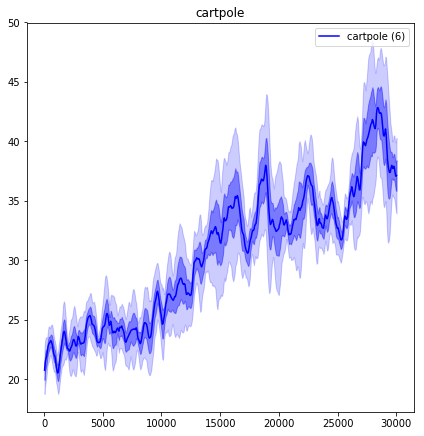

In [4]:
results = pu.load_results(log_path)
pu.plot_results(results, average_group=True)


In the following the Trust Regions have been turned off. 

In [ ]:
log_path="./logs/cartpole-notrust/"
for seed in range(0,3):
    run(seed=seed,trust_region=False, log_path=f"{log_path}cartpole-notrust-{str(seed)}/")

In [ ]:
results = pu.load_results(log_path)

pu.plot_results(results, average_group=True)

### A3C

A3C can be seen as a special case of Acer with replay_ratio = 0 and no trust regions.
It is an on-policy method

In [ ]:
log_path="./logs/cartpole-notrust-a3c/"
for seed in range(0,3):
    run(seed=seed,replay_ratio=0,trust_region=False, log_path=f"{log_path}cartpole-notrust-a3c-{str(seed)}/")

In [ ]:
results = pu.load_results(log_path)

pu.plot_results(results, average_group=True)

In [5]:
env="MountainCar-v0"
log_path=f"./logs/{env}/"

for seed in range(0,3):
    run(seed=seed, log_path=f"{log_path}{env}-{str(seed)}/", num_timesteps=3e5)

Logging to ./logs/MountainCar-v0/MountainCar-v0-0/
env_type: classic_control
Training acer on classic_control:CartPole-v0 with arguments 
{'trust_region': True, 'nsteps': 128, 'replay_ratio': 4, 'network': 'mlp'}
Running Acer Simple
{'network': 'mlp', 'env': <baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f0378bc4fd0>, 'seed': 0, 'nsteps': 128, 'total_timesteps': 300000, 'q_coef': 0.5, 'ent_coef': 0.01, 'max_grad_norm': 10, 'lr': 0.0007, 'lrschedule': 'linear', 'rprop_epsilon': 1e-05, 'rprop_alpha': 0.99, 'gamma': 0.99, 'log_interval': 100, 'buffer_size': 50000, 'replay_ratio': 4, 'replay_start': 10000, 'c': 10.0, 'trust_region': True, 'alpha': 0.99, 'delta': 1, 'load_path': None, 'network_kwargs': {}}
Params 8
<tf.Variable 'acer_model/pi/mlp_fc0/w:0' shape=(4, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc0/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/w:0' shape=(64, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/b:0' 

/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


acer_model/pi/mlp_fc0/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc0/b/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/b/ExponentialMovingAverage:0
acer_model/pi/w/ExponentialMovingAverage:0
acer_model/pi/b/ExponentialMovingAverage:0
acer_model/q/w/ExponentialMovingAverage:0
acer_model/q/b/ExponentialMovingAverage:0
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, 'acer_model/pi/mlp_fc0/w:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, 'acer_model/pi/mlp_fc0/b:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc1/MatMul_grad/MatMul_1:0' shape=(64, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc1/MatMul_grad/Ma

----------------------------------
| avg_norm_adj        | 4.38     |
| avg_norm_g          | 10.9     |
| avg_norm_grads_f    | 8.11     |
| avg_norm_k          | 1.41     |
| avg_norm_k_dot_g    | 10.9     |
| entropy             | 0.532    |
| explained_variance  | 0.971    |
| fps                 | 1.94e+03 |
| loss                | 5.01     |
| loss_bc             | -0       |
| loss_f              | -1.89    |
| loss_policy         | -1.89    |
| loss_q              | 13.8     |
| mean_episode_length | 115      |
| mean_episode_reward | 115      |
| norm_grads          | 80.4     |
| norm_grads_policy   | 3.01     |
| norm_grads_q        | 80.7     |
| total_timesteps     | 1.15e+05 |
----------------------------------
----------------------------------
| avg_norm_adj        | 4.66     |
| avg_norm_g          | 11.2     |
| avg_norm_grads_f    | 8.09     |
| avg_norm_k          | 1.45     |
| avg_norm_k_dot_g    | 11.6     |
| entropy             | 0.529    |
| explained_variance

----------------------------------
| avg_norm_adj        | 0        |
| avg_norm_g          | 13.7     |
| avg_norm_grads_f    | 13.7     |
| avg_norm_k          | 1.42     |
| avg_norm_k_dot_g    | 13.7     |
| entropy             | 0.563    |
| explained_variance  | -1.38    |
| fps                 | 1.79e+03 |
| loss                | 20.3     |
| loss_bc             | -0       |
| loss_f              | 3.48     |
| loss_policy         | 3.48     |
| loss_q              | 33.6     |
| mean_episode_length | 182      |
| mean_episode_reward | 182      |
| norm_grads          | 41.9     |
| norm_grads_policy   | 3.71     |
| norm_grads_q        | 40.7     |
| total_timesteps     | 2.69e+05 |
----------------------------------
----------------------------------
| avg_norm_adj        | 29.1     |
| avg_norm_g          | 59.9     |
| avg_norm_grads_f    | 42.3     |
| avg_norm_k          | 1.43     |
| avg_norm_k_dot_g    | 60.6     |
| entropy             | 0.515    |
| explained_variance

/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


acer_model/pi/mlp_fc0/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc0/b/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/b/ExponentialMovingAverage:0
acer_model/pi/w/ExponentialMovingAverage:0
acer_model/pi/b/ExponentialMovingAverage:0
acer_model/q/w/ExponentialMovingAverage:0
acer_model/q/b/ExponentialMovingAverage:0
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, 'acer_model/pi/mlp_fc0/w:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, 'acer_model/pi/mlp_fc0/b:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc1/MatMul_grad/MatMul_1:0' shape=(64, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc1/MatMul_grad/Ma

----------------------------------
| avg_norm_adj        | 0.538    |
| avg_norm_g          | 3.77     |
| avg_norm_grads_f    | 3.37     |
| avg_norm_k          | 1.46     |
| avg_norm_k_dot_g    | 3.98     |
| entropy             | 0.528    |
| explained_variance  | 0.965    |
| fps                 | 1.93e+03 |
| loss                | 1.76     |
| loss_bc             | -0       |
| loss_f              | 0.278    |
| loss_policy         | 0.278    |
| loss_q              | 2.97     |
| mean_episode_length | 180      |
| mean_episode_reward | 180      |
| norm_grads          | 8.23     |
| norm_grads_policy   | 1.13     |
| norm_grads_q        | 8.13     |
| total_timesteps     | 1.15e+05 |
----------------------------------
----------------------------------
| avg_norm_adj        | 0.156    |
| avg_norm_g          | 3.83     |
| avg_norm_grads_f    | 3.74     |
| avg_norm_k          | 1.4      |
| avg_norm_k_dot_g    | 3.78     |
| entropy             | 0.547    |
| explained_variance

----------------------------------
| avg_norm_adj        | 3.17     |
| avg_norm_g          | 21.1     |
| avg_norm_grads_f    | 19.3     |
| avg_norm_k          | 1.41     |
| avg_norm_k_dot_g    | 20.7     |
| entropy             | 0.507    |
| explained_variance  | 0.18     |
| fps                 | 1.92e+03 |
| loss                | 72.8     |
| loss_bc             | -0       |
| loss_f              | 1.78     |
| loss_policy         | 1.78     |
| loss_q              | 142      |
| mean_episode_length | 200      |
| mean_episode_reward | 200      |
| norm_grads          | 49.4     |
| norm_grads_policy   | 6.54     |
| norm_grads_q        | 48.6     |
| total_timesteps     | 2.69e+05 |
----------------------------------
----------------------------------
| avg_norm_adj        | 3.1      |
| avg_norm_g          | 21.6     |
| avg_norm_grads_f    | 19.9     |
| avg_norm_k          | 1.42     |
| avg_norm_k_dot_g    | 21.6     |
| entropy             | 0.549    |
| explained_variance

/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


acer_model/pi/mlp_fc0/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc0/b/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/b/ExponentialMovingAverage:0
acer_model/pi/w/ExponentialMovingAverage:0
acer_model/pi/b/ExponentialMovingAverage:0
acer_model/q/w/ExponentialMovingAverage:0
acer_model/q/b/ExponentialMovingAverage:0
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, 'acer_model/pi/mlp_fc0/w:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, 'acer_model/pi/mlp_fc0/b:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc1/MatMul_grad/MatMul_1:0' shape=(64, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc1/MatMul_grad/Ma

----------------------------------
| avg_norm_adj        | 9.06     |
| avg_norm_g          | 28.3     |
| avg_norm_grads_f    | 23       |
| avg_norm_k          | 1.4      |
| avg_norm_k_dot_g    | 27.7     |
| entropy             | 0.555    |
| explained_variance  | 0.512    |
| fps                 | 1.95e+03 |
| loss                | 111      |
| loss_bc             | -0       |
| loss_f              | -2.13    |
| loss_policy         | -2.13    |
| loss_q              | 227      |
| mean_episode_length | 181      |
| mean_episode_reward | 181      |
| norm_grads          | 285      |
| norm_grads_policy   | 11.7     |
| norm_grads_q        | 286      |
| total_timesteps     | 1.15e+05 |
----------------------------------
----------------------------------
| avg_norm_adj        | 10.9     |
| avg_norm_g          | 26.5     |
| avg_norm_grads_f    | 19.8     |
| avg_norm_k          | 1.43     |
| avg_norm_k_dot_g    | 26.9     |
| entropy             | 0.562    |
| explained_variance

----------------------------------
| avg_norm_adj        | 21.9     |
| avg_norm_g          | 51.5     |
| avg_norm_grads_f    | 38.3     |
| avg_norm_k          | 1.43     |
| avg_norm_k_dot_g    | 52.3     |
| entropy             | 0.601    |
| explained_variance  | 0.00643  |
| fps                 | 1.88e+03 |
| loss                | 341      |
| loss_bc             | -0       |
| loss_f              | -11.3    |
| loss_policy         | -11.3    |
| loss_q              | 704      |
| mean_episode_length | 189      |
| mean_episode_reward | 189      |
| norm_grads          | 122      |
| norm_grads_policy   | 13.3     |
| norm_grads_q        | 117      |
| total_timesteps     | 2.69e+05 |
----------------------------------
----------------------------------
| avg_norm_adj        | 0        |
| avg_norm_g          | 15.7     |
| avg_norm_grads_f    | 15.7     |
| avg_norm_k          | 1.42     |
| avg_norm_k_dot_g    | 15.8     |
| entropy             | 0.561    |
| explained_variance

/home/simon/Documents/WiSe20/topicsrl/a3cacerdemo/baselines/bench/monitor.py:162: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


(<Figure size 432x432 with 1 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02d7301dd8>]],
       dtype=object))

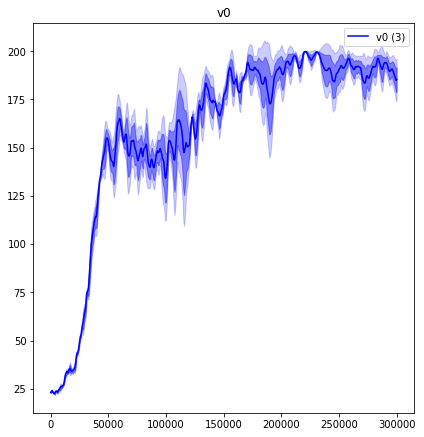

In [6]:
results = pu.load_results(log_path)

pu.plot_results(results, average_group=True)

### Play 

In [9]:
env="MountainCar-v0"
play(load_path="./models/model", env=env)

Logging to ./logs/acer/
env_type: classic_control
Training acer on classic_control:MountainCar-v0 with arguments 
{'trust_region': True, 'nsteps': 128, 'replay_ratio': 4, 'network': 'mlp'}
Running Acer Simple
{'network': 'mlp', 'env': <baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f03c82b7c18>, 'seed': 0, 'nsteps': 128, 'total_timesteps': 0, 'q_coef': 0.5, 'ent_coef': 0.01, 'max_grad_norm': 10, 'lr': 0.0007, 'lrschedule': 'linear', 'rprop_epsilon': 1e-05, 'rprop_alpha': 0.99, 'gamma': 0.99, 'log_interval': 100, 'buffer_size': 50000, 'replay_ratio': 4, 'replay_start': 10000, 'c': 10.0, 'trust_region': True, 'alpha': 0.99, 'delta': 1, 'load_path': None, 'network_kwargs': {}}


/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Params 8
<tf.Variable 'acer_model/pi/mlp_fc0/w:0' shape=(2, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc0/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/w:0' shape=(64, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/w:0' shape=(64, 3) dtype=float32_ref>
<tf.Variable 'acer_model/pi/b:0' shape=(3,) dtype=float32_ref>
<tf.Variable 'acer_model/q/w:0' shape=(64, 3) dtype=float32_ref>
<tf.Variable 'acer_model/q/b:0' shape=(3,) dtype=float32_ref>
acer_model/pi/mlp_fc0/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc0/b/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/b/ExponentialMovingAverage:0
acer_model/pi/w/ExponentialMovingAverage:0
acer_model/pi/b/ExponentialMovingAverage:0
acer_model/q/w/ExponentialMovingAverage:0
acer_model/q/b/ExponentialMovingAverage:0


Exception ignored in: <function SubprocVecEnv.__del__ at 0x7f03810ac6a8>
Traceback (most recent call last):
  File "/home/simon/Documents/WiSe20/topicsrl/a3cacerdemo/baselines/common/vec_env/subproc_vec_env.py", line 121, in __del__
    self.close()
  File "/home/simon/Documents/WiSe20/topicsrl/a3cacerdemo/baselines/common/vec_env/vec_env.py", line 98, in close
    self.close_extras()
  File "/home/simon/Documents/WiSe20/topicsrl/a3cacerdemo/baselines/common/vec_env/subproc_vec_env.py", line 104, in close_extras
    remote.send(('close', None))
  File "/home/simon/miniconda3/envs/science/lib/python3.7/multiprocessing/connection.py", line 206, in send
    self._send_bytes(_ForkingPickler.dumps(obj))
  File "/home/simon/miniconda3/envs/science/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/home/simon/miniconda3/envs/science/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
Broken

[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(2, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(2, 64) dtype=float32>, 'acer_model/pi/mlp_fc0/w:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, 'acer_model/pi/mlp_fc0/b:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc1/MatMul_grad/MatMul_1:0' shape=(64, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc1/MatMul_grad/MatMul_1:0' shape=(64, 64) dtype=float32>, 'acer_model/pi/mlp_fc1/w:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc1/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc1/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, 'acer_model/pi/mlp_fc1/b:0']
[<tf.Tensor 'gradients_1/acer_model/pi_3/MatMul_grad/MatMul_1:0' shape=(64, 3)

KeyboardInterrupt: 

In [11]:
env="PongNoFrameskip-v4"
play(load_path="/home/simon/Documents/WiSe20/topicsrl/a3cacerdemo/models/pong3m", env=env)

Logging to ./logs/acer/
env_type: atari
Training acer on atari:PongNoFrameskip-v4 with arguments 
{'lrschedule': 'constant', 'trust_region': True, 'nsteps': 128, 'replay_ratio': 4, 'network': 'cnn'}
Running Acer Simple
{'network': 'cnn', 'env': <baselines.common.vec_env.vec_frame_stack.VecFrameStack object at 0x7f0255e79978>, 'seed': 0, 'nsteps': 128, 'total_timesteps': 0, 'q_coef': 0.5, 'ent_coef': 0.01, 'max_grad_norm': 10, 'lr': 0.0007, 'lrschedule': 'constant', 'rprop_epsilon': 1e-05, 'rprop_alpha': 0.99, 'gamma': 0.99, 'log_interval': 100, 'buffer_size': 50000, 'replay_ratio': 4, 'replay_start': 10000, 'c': 10.0, 'trust_region': True, 'alpha': 0.99, 'delta': 1, 'load_path': None, 'network_kwargs': {}}


/home/simon/miniconda3/envs/science/lib/python3.7/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Params 12
<tf.Variable 'acer_model/pi/c1/w:0' shape=(8, 8, 4, 32) dtype=float32_ref>
<tf.Variable 'acer_model/pi/c1/b:0' shape=(1, 32, 1, 1) dtype=float32_ref>
<tf.Variable 'acer_model/pi/c2/w:0' shape=(4, 4, 32, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/c2/b:0' shape=(1, 64, 1, 1) dtype=float32_ref>
<tf.Variable 'acer_model/pi/c3/w:0' shape=(3, 3, 64, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/c3/b:0' shape=(1, 64, 1, 1) dtype=float32_ref>
<tf.Variable 'acer_model/pi/fc1/w:0' shape=(3136, 512) dtype=float32_ref>
<tf.Variable 'acer_model/pi/fc1/b:0' shape=(512,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/w:0' shape=(512, 6) dtype=float32_ref>
<tf.Variable 'acer_model/pi/b:0' shape=(6,) dtype=float32_ref>
<tf.Variable 'acer_model/q/w:0' shape=(512, 6) dtype=float32_ref>
<tf.Variable 'acer_model/q/b:0' shape=(6,) dtype=float32_ref>
acer_model/pi/c1/w/ExponentialMovingAverage:0
acer_model/pi/c1/b/ExponentialMovingAverage:0
acer_model/pi/c2/w/ExponentialMovingAverage:0

KeyboardInterrupt: 